In [14]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 

data=pd.read_csv('/home/iai/heo/datamining_project/3.Student performance/student_performance.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [15]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [16]:
data.shape

(649, 33)

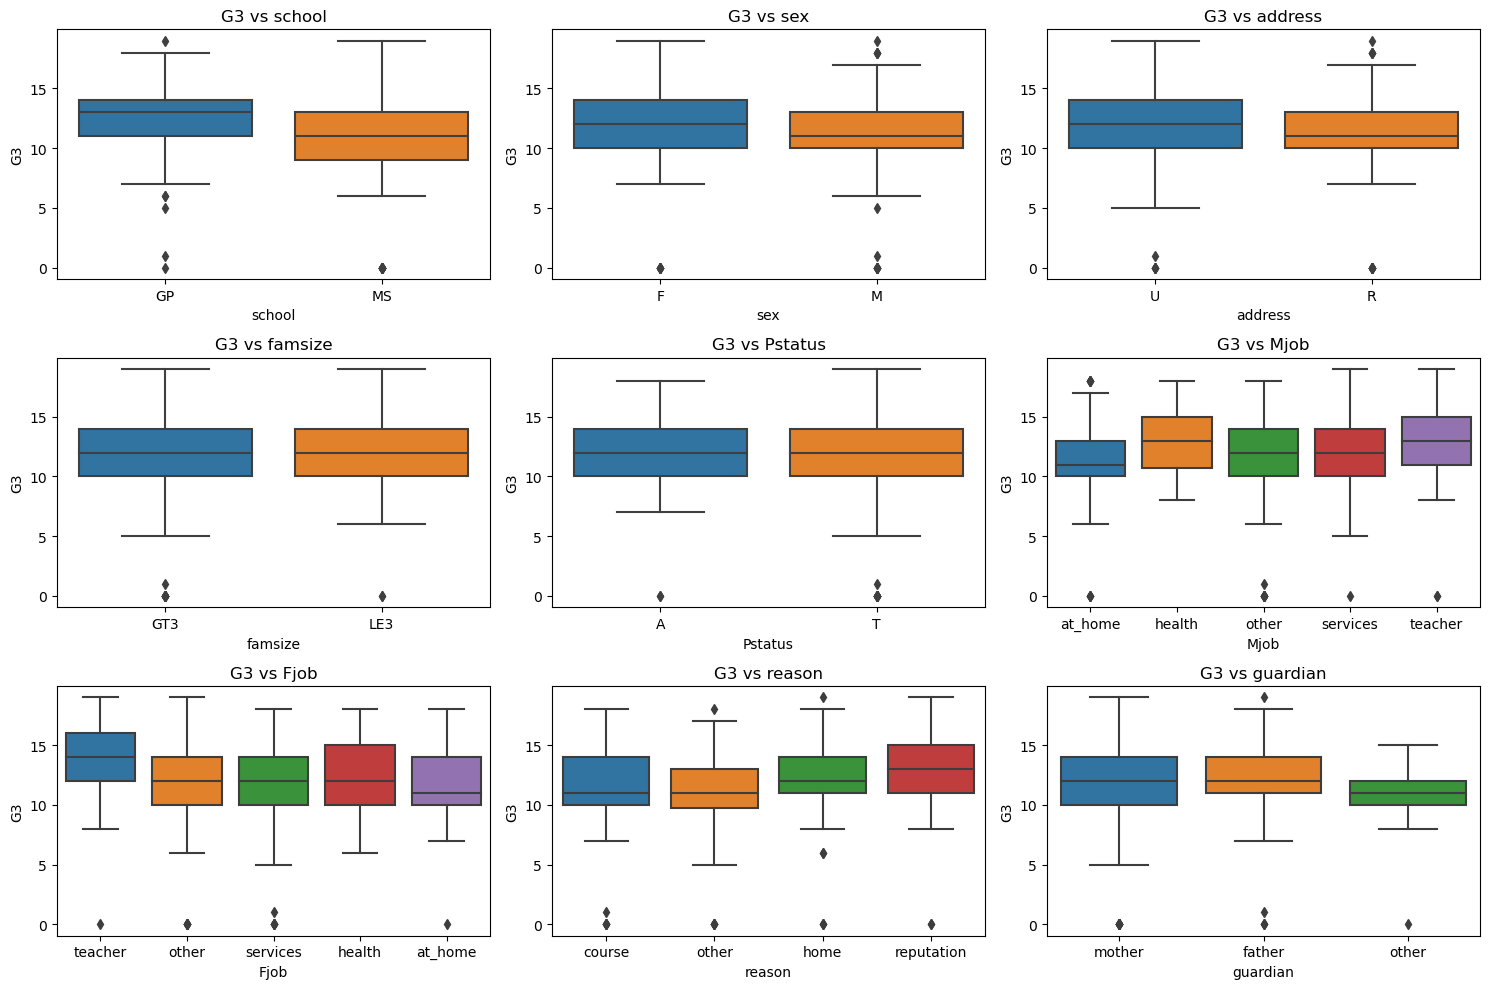

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Identify categorical variables
categorical_vars = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']

# Plot boxplots for G3 against each categorical variable
plt.figure(figsize=(15, 10))

for i, var in enumerate(categorical_vars):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=var, y='G3', data=data)
    plt.title(f'G3 vs {var}')

plt.tight_layout()
plt.show()


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
data.shape

(649, 33)

In [6]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [61]:
data.corr()

/tmp/ipykernel_4130695/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719


Text(0.5, 1.0, 'G3 boxplot')

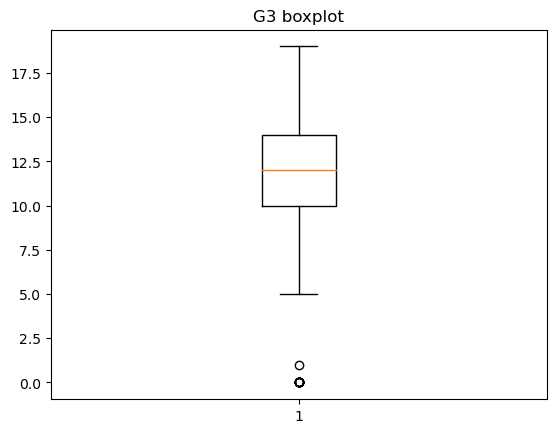

In [10]:
# G3의 기술통계량

import matplotlib.pyplot as plt 

plt.boxplot(data['G3'])
plt.title('G3 boxplot')

In [9]:
data['G3'].describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

In [62]:
data.isnull().sum().sort_values(ascending=False)/data.shape[0]*100

school        0.0
paid          0.0
G2            0.0
G1            0.0
absences      0.0
health        0.0
Walc          0.0
Dalc          0.0
goout         0.0
freetime      0.0
famrel        0.0
romantic      0.0
internet      0.0
higher        0.0
nursery       0.0
activities    0.0
famsup        0.0
sex           0.0
schoolsup     0.0
failures      0.0
studytime     0.0
traveltime    0.0
guardian      0.0
reason        0.0
Fjob          0.0
Mjob          0.0
Fedu          0.0
Medu          0.0
Pstatus       0.0
famsize       0.0
address       0.0
age           0.0
G3            0.0
dtype: float64

In [63]:
for i in data.columns:
    print(i)
    print("    ")
    print(data[i].value_counts())
    print("    ")

school
    
GP    423
MS    226
Name: school, dtype: int64
    
sex
    
F    383
M    266
Name: sex, dtype: int64
    
age
    
17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64
    
address
    
U    452
R    197
Name: address, dtype: int64
    
famsize
    
GT3    457
LE3    192
Name: famsize, dtype: int64
    
Pstatus
    
T    569
A     80
Name: Pstatus, dtype: int64
    
Medu
    
2    186
4    175
1    143
3    139
0      6
Name: Medu, dtype: int64
    
Fedu
    
2    209
1    174
3    131
4    128
0      7
Name: Fedu, dtype: int64
    
Mjob
    
other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64
    
Fjob
    
other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64
    
reason
    
course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64
    
guardian
    
mother    455
father    15

In [64]:
from sklearn.model_selection import train_test_split 

X=data.drop(['G3'],axis=1)
y=data['G3']

In [65]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

print(y_train.shape, y_test.shape)

(519,) (130,)


In [66]:
categorical_features=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

In [67]:
le = LabelEncoder()
for col in categorical_features:    
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [68]:
X_train.to_csv('/home/iai/heo/datamining_project/3.Student performance/dataset/X_train.csv',index=False)
X_test.to_csv('/home/iai/heo/datamining_project/3.Student performance/dataset/X_test.csv',index=False)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)
y_train.to_csv('/home/iai/heo/datamining_project/3.Student performance/dataset/y_train.csv',index=False)
y_test.to_csv('/home/iai/heo/datamining_project/3.Student performance/dataset/y_test.csv',index=False)

In [69]:
y_train

,G3
290,11
213,11
518,8
299,12
571,9
...,...
116,16
103,10
462,14
529,11
